# Importing all required Libraries 

In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.decomposition import PCA
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Data Importing and Basic data analysis

In [20]:
data=pd.read_csv('C:/Users/EJAIDIV/Downloads/DataScientist-Casestudy(1)/DataScientist-Casestudy/CaseStudy_FraudIdentification.csv')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  int64  
 1   Gender                      30000 non-null  object 
 2   EDUCATION                   30000 non-null  object 
 3   MARRIAGE                    30000 non-null  object 
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

In [11]:
# checking null values
data.isna().sum()  

LIMIT_BAL                     0
Gender                        0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [17]:
data.head()

,LIMIT_BAL,Gender,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,Female,university,Married,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0,0.0,0.0,0.0,1
1,120000,Female,university,single,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000,1000.0,0.0,2000.0,1
2,90000,Female,university,single,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000,1000.0,1000.0,5000.0,0
3,50000,Female,university,Married,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200,1100.0,1069.0,1000.0,0
4,50000,Male,university,Married,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000,9000.0,689.0,679.0,0


C:\Users\EJAIDIV\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EJAIDIV\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


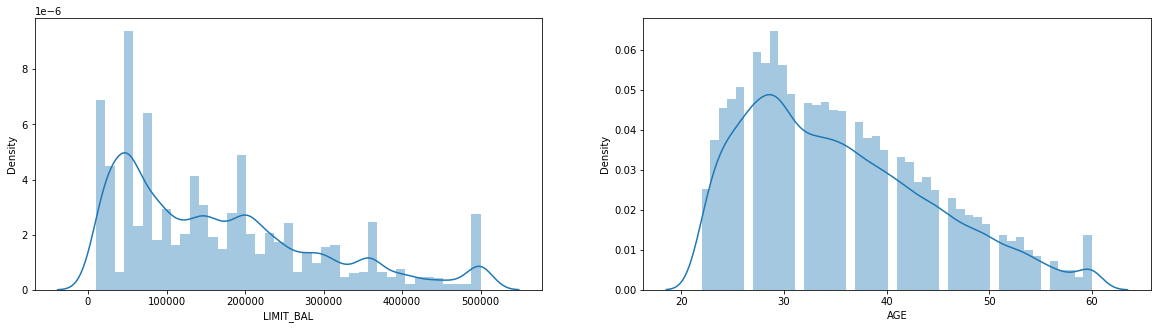

In [13]:
#ploting chart to check 
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(data.LIMIT_BAL)

plt.subplot(122)
sns.distplot(data.AGE)

plt.show()

In [4]:
#Correlation 
 
data.corr()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
LIMIT_BAL,1.000000,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
AGE,0.144713,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,0.054283,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.271214,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.296382,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.286123,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.267460,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,0.225816,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
PAY_5,-0.249411,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900,0.206684,0.226913,...,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149
PAY_6,-0.235195,-0.048773,0.474553,0.575501,0.632684,0.716449,0.816900,1.000000,0.207373,0.226924,...,0.266356,0.290894,0.285091,-0.001496,-0.005223,0.005834,0.019018,-0.046434,-0.025299,0.186866
BILL_AMT1,0.285430,0.056239,0.187068,0.234887,0.208473,0.202812,0.206684,0.207373,1.000000,0.951484,...,0.860272,0.829779,0.802650,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341,-0.019644
BILL_AMT2,0.278314,0.054283,0.189859,0.235257,0.237295,0.225816,0.226913,0.226924,0.951484,1.000000,...,0.892482,0.859778,0.831594,0.280365,0.100851,0.150718,0.147398,0.157957,0.174256,-0.014193


In [5]:
# Treating outliers if any
def cap_data(data):
    for col in data.columns:
        print("capping the ",col)
        if (((data[col].dtype)=='float64') | ((data[col].dtype)=='int64')):
            percentiles = data[col].quantile([0.01,0.99]).values
            data[col][data[col] <= percentiles[0]] = percentiles[0]
            data[col][data[col] >= percentiles[1]] = percentiles[1]
        else:
            data[col]=data[col]
    return data
final_df=cap_data(data)

capping the  LIMIT_BAL
capping the  Gender
capping the  EDUCATION
capping the  MARRIAGE
capping the  AGE
capping the  PAY_0
capping the  PAY_2
capping the  PAY_3
capping the  PAY_4
capping the  PAY_5
capping the  PAY_6
capping the  BILL_AMT1
capping the  BILL_AMT2
capping the  BILL_AMT3
capping the  BILL_AMT4
capping the  BILL_AMT5
capping the  BILL_AMT6
capping the  PAY_AMT1
capping the  PAY_AMT2
capping the  PAY_AMT3
capping the  PAY_AMT4
capping the  PAY_AMT5
capping the  PAY_AMT6
capping the  default payment next month


C:\Users\EJAIDIV\AppData\Local\Temp/ipykernel_9708/3132632679.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][data[col] <= percentiles[0]] = percentiles[0]
C:\Users\EJAIDIV\AppData\Local\Temp/ipykernel_9708/3132632679.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][data[col] >= percentiles[1]] = percentiles[1]
C:\Users\EJAIDIV\AppData\Local\Temp/ipykernel_9708/3132632679.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [6]:
# To convert cat data into dummies
final_df1 =pd.concat([pd.get_dummies(final_df[['Gender','EDUCATION','MARRIAGE']]),final_df[['LIMIT_BAL','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default payment next month']]],axis=1)

In [7]:
# Spliting data into train and test
x=final_df1.drop(['default payment next month'],axis=1)
y=final_df1['default payment next month']


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25,random_state=27)

Model1 Accuracy score is : 80.16
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      5846
           1       0.71      0.17      0.27      1654

    accuracy                           0.80      7500
   macro avg       0.76      0.58      0.58      7500
weighted avg       0.79      0.80      0.75      7500



C:\Users\EJAIDIV\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


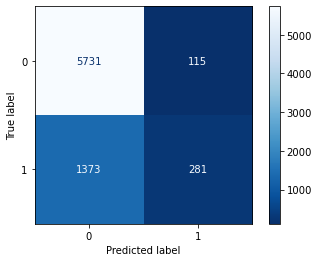

In [23]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier # Model 1 or Base Model
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
model1 = RidgeClassifier()

model1.fit(X_train, Y_train)

model1_acc = model1.score(X_test, Y_test)*100

print('Model1 Accuracy score is :', model1_acc)

print( classification_report(Y_test, model1.predict(X_test)) )

plot_confusion_matrix(model1, X_test, Y_test, cmap="Blues_r")

plt.show()

In [13]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
x, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.850 (0.128)


In [24]:
RFReg = RandomForestRegressor()
param_grid = { 
    'n_estimators': [10, 25, 50, 80],
    'max_depth' : [1,3,4,5]
}

CV_rfc = GridSearchCV(estimator=RFReg, param_grid=param_grid, cv= 10)
CV_rfc.fit(X_train, Y_train)

CV_rfc.best_params_ 
#{'max_depth': 10, 'n_estimators': 100}

{'max_depth': 5, 'n_estimators': 80}

In [17]:
RFReg = RandomForestRegressor(max_depth = 10, n_estimators = 100, random_state = 1)
RFReg.fit(X_train, Y_train)
y_pred = RFReg.predict(X_test)
y_pred_train = RFReg.predict(X_train)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [19]:
accuracy =RFReg.score(x,y)
print( 'Linear Regression Accuracy: ', accuracy*100,'%')

C:\Users\EJAIDIV\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


ValueError: X has 20 features, but RandomForestRegressor is expecting 33 features as input.

In [19]:
from catboost import CatBoostClassifier
cb_model = CatBoostClassifier(learning_rate=0.055, 
                          n_estimators=1000,
                              use_best_model=True,
                              eval_metric='Accuracy',
                          subsample=0.075, 
                          max_depth=8, 
                          verbose=100,
                          l2_leaf_reg = 7,
                          bootstrap_type="Bernoulli",
                          loss_function='MultiClass')

In [20]:
cb_model.fit(X_train, Y_train,eval_set=(X_test,Y_test),verbose=True)


0:	learn: 0.8025778	test: 0.7973333	best: 0.7973333 (0)	total: 268ms	remaining: 4m 27s
1:	learn: 0.8152889	test: 0.8068000	best: 0.8068000 (1)	total: 296ms	remaining: 2m 27s
2:	learn: 0.8157778	test: 0.8081333	best: 0.8081333 (2)	total: 324ms	remaining: 1m 47s
3:	learn: 0.8205778	test: 0.8106667	best: 0.8106667 (3)	total: 351ms	remaining: 1m 27s
4:	learn: 0.8220444	test: 0.8102667	best: 0.8106667 (3)	total: 378ms	remaining: 1m 15s
5:	learn: 0.8228889	test: 0.8121333	best: 0.8121333 (5)	total: 405ms	remaining: 1m 7s
6:	learn: 0.8225778	test: 0.8133333	best: 0.8133333 (6)	total: 430ms	remaining: 1m 1s
7:	learn: 0.8229778	test: 0.8128000	best: 0.8133333 (6)	total: 458ms	remaining: 56.8s
8:	learn: 0.8216444	test: 0.8105333	best: 0.8133333 (6)	total: 493ms	remaining: 54.3s
9:	learn: 0.8221778	test: 0.8116000	best: 0.8133333 (6)	total: 510ms	remaining: 50.5s
10:	learn: 0.8227556	test: 0.8129333	best: 0.8133333 (6)	total: 540ms	remaining: 48.5s
11:	learn: 0.8233333	test: 0.8140000	best: 0.814

96:	learn: 0.8277333	test: 0.8160000	best: 0.8176000 (29)	total: 3.14s	remaining: 29.2s
97:	learn: 0.8279111	test: 0.8157333	best: 0.8176000 (29)	total: 3.19s	remaining: 29.3s
98:	learn: 0.8280000	test: 0.8157333	best: 0.8176000 (29)	total: 3.22s	remaining: 29.3s
99:	learn: 0.8279556	test: 0.8157333	best: 0.8176000 (29)	total: 3.26s	remaining: 29.3s
100:	learn: 0.8282222	test: 0.8157333	best: 0.8176000 (29)	total: 3.29s	remaining: 29.3s
101:	learn: 0.8281778	test: 0.8156000	best: 0.8176000 (29)	total: 3.33s	remaining: 29.3s
102:	learn: 0.8282222	test: 0.8158667	best: 0.8176000 (29)	total: 3.37s	remaining: 29.3s
103:	learn: 0.8281778	test: 0.8161333	best: 0.8176000 (29)	total: 3.4s	remaining: 29.3s
104:	learn: 0.8280889	test: 0.8160000	best: 0.8176000 (29)	total: 3.43s	remaining: 29.2s
105:	learn: 0.8283556	test: 0.8161333	best: 0.8176000 (29)	total: 3.46s	remaining: 29.1s
106:	learn: 0.8283111	test: 0.8161333	best: 0.8176000 (29)	total: 3.48s	remaining: 29.1s
107:	learn: 0.8283111	test

191:	learn: 0.8336889	test: 0.8164000	best: 0.8176000 (29)	total: 6.21s	remaining: 26.1s
192:	learn: 0.8336889	test: 0.8165333	best: 0.8176000 (29)	total: 6.25s	remaining: 26.1s
193:	learn: 0.8337333	test: 0.8162667	best: 0.8176000 (29)	total: 6.28s	remaining: 26.1s
194:	learn: 0.8338667	test: 0.8164000	best: 0.8176000 (29)	total: 6.3s	remaining: 26s
195:	learn: 0.8337333	test: 0.8165333	best: 0.8176000 (29)	total: 6.33s	remaining: 26s
196:	learn: 0.8337778	test: 0.8164000	best: 0.8176000 (29)	total: 6.36s	remaining: 25.9s
197:	learn: 0.8337333	test: 0.8165333	best: 0.8176000 (29)	total: 6.39s	remaining: 25.9s
198:	learn: 0.8340000	test: 0.8162667	best: 0.8176000 (29)	total: 6.42s	remaining: 25.9s
199:	learn: 0.8342667	test: 0.8165333	best: 0.8176000 (29)	total: 6.45s	remaining: 25.8s
200:	learn: 0.8344000	test: 0.8164000	best: 0.8176000 (29)	total: 6.48s	remaining: 25.8s
201:	learn: 0.8342667	test: 0.8166667	best: 0.8176000 (29)	total: 6.51s	remaining: 25.7s
202:	learn: 0.8343556	test

290:	learn: 0.8398222	test: 0.8152000	best: 0.8176000 (29)	total: 9.03s	remaining: 22s
291:	learn: 0.8399111	test: 0.8154667	best: 0.8176000 (29)	total: 9.06s	remaining: 22s
292:	learn: 0.8398667	test: 0.8158667	best: 0.8176000 (29)	total: 9.09s	remaining: 21.9s
293:	learn: 0.8400889	test: 0.8158667	best: 0.8176000 (29)	total: 9.13s	remaining: 21.9s
294:	learn: 0.8401778	test: 0.8158667	best: 0.8176000 (29)	total: 9.16s	remaining: 21.9s
295:	learn: 0.8402222	test: 0.8156000	best: 0.8176000 (29)	total: 9.2s	remaining: 21.9s
296:	learn: 0.8405333	test: 0.8154667	best: 0.8176000 (29)	total: 9.23s	remaining: 21.8s
297:	learn: 0.8405333	test: 0.8158667	best: 0.8176000 (29)	total: 9.26s	remaining: 21.8s
298:	learn: 0.8406667	test: 0.8158667	best: 0.8176000 (29)	total: 9.29s	remaining: 21.8s
299:	learn: 0.8404889	test: 0.8160000	best: 0.8176000 (29)	total: 9.32s	remaining: 21.7s
300:	learn: 0.8406222	test: 0.8162667	best: 0.8176000 (29)	total: 9.34s	remaining: 21.7s
301:	learn: 0.8406667	test

386:	learn: 0.8457333	test: 0.8164000	best: 0.8176000 (29)	total: 11.9s	remaining: 18.8s
387:	learn: 0.8458222	test: 0.8162667	best: 0.8176000 (29)	total: 11.9s	remaining: 18.8s
388:	learn: 0.8459556	test: 0.8165333	best: 0.8176000 (29)	total: 11.9s	remaining: 18.7s
389:	learn: 0.8460000	test: 0.8168000	best: 0.8176000 (29)	total: 12s	remaining: 18.7s
390:	learn: 0.8461778	test: 0.8166667	best: 0.8176000 (29)	total: 12s	remaining: 18.7s
391:	learn: 0.8463111	test: 0.8166667	best: 0.8176000 (29)	total: 12s	remaining: 18.6s
392:	learn: 0.8463556	test: 0.8168000	best: 0.8176000 (29)	total: 12s	remaining: 18.6s
393:	learn: 0.8462222	test: 0.8170667	best: 0.8176000 (29)	total: 12.1s	remaining: 18.6s
394:	learn: 0.8461778	test: 0.8170667	best: 0.8176000 (29)	total: 12.1s	remaining: 18.5s
395:	learn: 0.8461333	test: 0.8170667	best: 0.8176000 (29)	total: 12.1s	remaining: 18.5s
396:	learn: 0.8462222	test: 0.8170667	best: 0.8176000 (29)	total: 12.2s	remaining: 18.5s
397:	learn: 0.8463111	test: 0

481:	learn: 0.8504889	test: 0.8172000	best: 0.8182667 (464)	total: 14.6s	remaining: 15.7s
482:	learn: 0.8504444	test: 0.8173333	best: 0.8182667 (464)	total: 14.6s	remaining: 15.6s
483:	learn: 0.8504889	test: 0.8173333	best: 0.8182667 (464)	total: 14.6s	remaining: 15.6s
484:	learn: 0.8504444	test: 0.8172000	best: 0.8182667 (464)	total: 14.6s	remaining: 15.6s
485:	learn: 0.8502667	test: 0.8173333	best: 0.8182667 (464)	total: 14.7s	remaining: 15.5s
486:	learn: 0.8504000	test: 0.8173333	best: 0.8182667 (464)	total: 14.7s	remaining: 15.5s
487:	learn: 0.8507556	test: 0.8173333	best: 0.8182667 (464)	total: 14.7s	remaining: 15.5s
488:	learn: 0.8508000	test: 0.8176000	best: 0.8182667 (464)	total: 14.8s	remaining: 15.4s
489:	learn: 0.8506667	test: 0.8174667	best: 0.8182667 (464)	total: 14.8s	remaining: 15.4s
490:	learn: 0.8508000	test: 0.8177333	best: 0.8182667 (464)	total: 14.8s	remaining: 15.4s
491:	learn: 0.8508000	test: 0.8176000	best: 0.8182667 (464)	total: 14.8s	remaining: 15.3s
492:	learn

580:	learn: 0.8557778	test: 0.8168000	best: 0.8182667 (464)	total: 17.4s	remaining: 12.5s
581:	learn: 0.8555556	test: 0.8168000	best: 0.8182667 (464)	total: 17.4s	remaining: 12.5s
582:	learn: 0.8556889	test: 0.8170667	best: 0.8182667 (464)	total: 17.4s	remaining: 12.5s
583:	learn: 0.8556444	test: 0.8170667	best: 0.8182667 (464)	total: 17.5s	remaining: 12.4s
584:	learn: 0.8559111	test: 0.8168000	best: 0.8182667 (464)	total: 17.5s	remaining: 12.4s
585:	learn: 0.8558667	test: 0.8168000	best: 0.8182667 (464)	total: 17.5s	remaining: 12.4s
586:	learn: 0.8562222	test: 0.8164000	best: 0.8182667 (464)	total: 17.5s	remaining: 12.3s
587:	learn: 0.8561778	test: 0.8164000	best: 0.8182667 (464)	total: 17.6s	remaining: 12.3s
588:	learn: 0.8561778	test: 0.8164000	best: 0.8182667 (464)	total: 17.6s	remaining: 12.3s
589:	learn: 0.8563111	test: 0.8166667	best: 0.8182667 (464)	total: 17.6s	remaining: 12.3s
590:	learn: 0.8563556	test: 0.8168000	best: 0.8182667 (464)	total: 17.7s	remaining: 12.2s
591:	learn

677:	learn: 0.8596889	test: 0.8164000	best: 0.8182667 (464)	total: 20.3s	remaining: 9.64s
678:	learn: 0.8598667	test: 0.8165333	best: 0.8182667 (464)	total: 20.3s	remaining: 9.61s
679:	learn: 0.8601333	test: 0.8162667	best: 0.8182667 (464)	total: 20.4s	remaining: 9.59s
680:	learn: 0.8599111	test: 0.8162667	best: 0.8182667 (464)	total: 20.4s	remaining: 9.55s
681:	learn: 0.8600889	test: 0.8164000	best: 0.8182667 (464)	total: 20.4s	remaining: 9.52s
682:	learn: 0.8601333	test: 0.8165333	best: 0.8182667 (464)	total: 20.5s	remaining: 9.49s
683:	learn: 0.8600444	test: 0.8164000	best: 0.8182667 (464)	total: 20.5s	remaining: 9.46s
684:	learn: 0.8599556	test: 0.8165333	best: 0.8182667 (464)	total: 20.5s	remaining: 9.43s
685:	learn: 0.8600000	test: 0.8165333	best: 0.8182667 (464)	total: 20.5s	remaining: 9.4s
686:	learn: 0.8602667	test: 0.8165333	best: 0.8182667 (464)	total: 20.6s	remaining: 9.37s
687:	learn: 0.8603111	test: 0.8164000	best: 0.8182667 (464)	total: 20.6s	remaining: 9.34s
688:	learn:

775:	learn: 0.8645333	test: 0.8154667	best: 0.8182667 (464)	total: 23.4s	remaining: 6.75s
776:	learn: 0.8642667	test: 0.8150667	best: 0.8182667 (464)	total: 23.4s	remaining: 6.72s
777:	learn: 0.8644444	test: 0.8156000	best: 0.8182667 (464)	total: 23.5s	remaining: 6.69s
778:	learn: 0.8645333	test: 0.8152000	best: 0.8182667 (464)	total: 23.5s	remaining: 6.67s
779:	learn: 0.8645778	test: 0.8160000	best: 0.8182667 (464)	total: 23.5s	remaining: 6.63s
780:	learn: 0.8644889	test: 0.8156000	best: 0.8182667 (464)	total: 23.6s	remaining: 6.61s
781:	learn: 0.8648444	test: 0.8160000	best: 0.8182667 (464)	total: 23.6s	remaining: 6.58s
782:	learn: 0.8648000	test: 0.8157333	best: 0.8182667 (464)	total: 23.6s	remaining: 6.55s
783:	learn: 0.8648444	test: 0.8156000	best: 0.8182667 (464)	total: 23.7s	remaining: 6.53s
784:	learn: 0.8652000	test: 0.8158667	best: 0.8182667 (464)	total: 23.8s	remaining: 6.5s
785:	learn: 0.8650667	test: 0.8158667	best: 0.8182667 (464)	total: 23.8s	remaining: 6.48s
786:	learn:

873:	learn: 0.8698222	test: 0.8156000	best: 0.8182667 (464)	total: 26.3s	remaining: 3.79s
874:	learn: 0.8698222	test: 0.8154667	best: 0.8182667 (464)	total: 26.3s	remaining: 3.75s
875:	learn: 0.8696889	test: 0.8157333	best: 0.8182667 (464)	total: 26.3s	remaining: 3.72s
876:	learn: 0.8697333	test: 0.8157333	best: 0.8182667 (464)	total: 26.3s	remaining: 3.69s
877:	learn: 0.8697778	test: 0.8158667	best: 0.8182667 (464)	total: 26.4s	remaining: 3.66s
878:	learn: 0.8697333	test: 0.8157333	best: 0.8182667 (464)	total: 26.4s	remaining: 3.63s
879:	learn: 0.8697778	test: 0.8157333	best: 0.8182667 (464)	total: 26.4s	remaining: 3.6s
880:	learn: 0.8699111	test: 0.8154667	best: 0.8182667 (464)	total: 26.4s	remaining: 3.57s
881:	learn: 0.8699111	test: 0.8153333	best: 0.8182667 (464)	total: 26.5s	remaining: 3.54s
882:	learn: 0.8698222	test: 0.8153333	best: 0.8182667 (464)	total: 26.5s	remaining: 3.51s
883:	learn: 0.8700000	test: 0.8156000	best: 0.8182667 (464)	total: 26.5s	remaining: 3.48s
884:	learn:

967:	learn: 0.8737333	test: 0.8148000	best: 0.8182667 (464)	total: 29.1s	remaining: 961ms
968:	learn: 0.8737778	test: 0.8146667	best: 0.8182667 (464)	total: 29.1s	remaining: 931ms
969:	learn: 0.8738222	test: 0.8148000	best: 0.8182667 (464)	total: 29.1s	remaining: 901ms
970:	learn: 0.8738222	test: 0.8149333	best: 0.8182667 (464)	total: 29.2s	remaining: 871ms
971:	learn: 0.8739111	test: 0.8152000	best: 0.8182667 (464)	total: 29.2s	remaining: 841ms
972:	learn: 0.8740000	test: 0.8148000	best: 0.8182667 (464)	total: 29.2s	remaining: 810ms
973:	learn: 0.8740444	test: 0.8149333	best: 0.8182667 (464)	total: 29.2s	remaining: 780ms
974:	learn: 0.8741333	test: 0.8149333	best: 0.8182667 (464)	total: 29.3s	remaining: 750ms
975:	learn: 0.8740889	test: 0.8149333	best: 0.8182667 (464)	total: 29.3s	remaining: 720ms
976:	learn: 0.8742667	test: 0.8154667	best: 0.8182667 (464)	total: 29.3s	remaining: 690ms
977:	learn: 0.8743111	test: 0.8153333	best: 0.8182667 (464)	total: 29.3s	remaining: 660ms
978:	learn

In [16]:
pd.DataFrame(classification_report(Y_train, cb_model.predict(X_train),output_dict=True))

NameError: name 'cb_model' is not defined

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(criterion='entropy')   
rf_clf.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy')

In [14]:
Y_predict = rf_clf.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(Y_test,Y_predict)

0.8150666666666667